In [7]:
# Import Zip Codes from Zillow

import pandas as pd
import numpy as np

# Import Zip Codes as string to handle zip codes which start with a 0
datatypes={'RegionName':str,
           'Zhvi':'int64'}

# Read CSV
zhv=pd.read_csv("Zip_Zhvi_Summary_AllHomes.csv",encoding='latin-1',dtype=datatypes)
zips=zhv[['RegionName','Zhvi']]

# Loop through zip codes and add 0 at start of 4 digit zip codes
for index,row in zips.iterrows():
    if len(row['RegionName']) == 4:
        zips.loc[index,'RegionName']='0'+row['RegionName']
        
zips.head()

/Users/edshafron/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,RegionName,Zhvi
0,10025,1027300
1,60657,352300
2,10023,1363000
3,77494,335200
4,60614,431800


In [509]:
zips.loc[90:95,:]

,RegionName,Zhvi
90,28027,232100
91,75067,256000
92,23462,199400
93,11377,755400
94,02169,432400
95,48197,223500


In [8]:
# Rename variables in zip code data set
zips=zips.rename(columns={'RegionName':'Zip Code'})

In [9]:
# List of variables
crime_vars=('County',
'Assault Risk',
'Burglary Risk',
'Larceny Risk',
'Murder Risk',
'Motor Vehicle Theft Risk',
'Personal Crime Risk',
'Property Crime Risk',
'Rape Risk',
'Robbery Risk',
'Total Crime Risk',
'Median household income',
'Population Density',
'fips',
'Closest City',
'State')

# Create dataframe to store results
crimes_df=pd.DataFrame({})
crimes_df['Zip Code']=''

# Add variables to dataframe to populate
for var in crime_vars:
    crimes_df[var]=''
crimes_df.head()

,Zip Code,County,Assault Risk,Burglary Risk,Larceny Risk,Murder Risk,Motor Vehicle Theft Risk,Personal Crime Risk,Property Crime Risk,Rape Risk,Robbery Risk,Total Crime Risk,Median household income,Population Density,fips,Closest City,State


In [10]:
# Import dependencies
import requests
import json

# Shorter section of zip codes to test code
zips_short=zips.iloc[range(0,100),:]

# Define arguments for API request

# my attom api key
api_key=''

# base endpoint url
base_url = 'https://search.onboard-apis.com/communityapi/v2.0.0/Area/full'

# headers dictionary, contains the key & return type
headers = {
  'accept': "application/json",
  'apikey': "",
}

# parameters dictionary
parameters = {
   'AreaId':'ZI92109'
}

# List of relevant field names in API
api_fields=('countyname', # County
'crmcyasst', # Assault Risk
'crmcyburg', # Burglary Risk
'crmcylarc', # Larceny Risk
'crmcymurd', # Murder Risk
'crmcymveh', # Motor Vehicle Theft Risk
'crmcyperc', # Personal Crime Risk
'crmcyproc', # Property Crime Risk
'crmcyrape', # Rape Risk
'crmcyrobb', # Robbery Risk
'crmcytotc', # Total Crime Risk
'inccymedd', # Median household income   
'popdnsty', # Population Density
'county5', # fips
'city500_closest_name', # Closest City Name
'statename' # State
)

In [235]:
# Loop through zip codes & store JSON output to text file

# Create list for storing JSON output
json_output=[]

# Loop through zip codes & periodically save ouput
# for index, row in zips_short.iterrows():
# for index, row in zips.iterrows():
for index, row in zips.loc[13900:].iterrows():
    zipcode=row['Zip Code']
    
    # Update Zip Code in Parameters dictionary
    parameters = {
       'AreaId':f'ZI{zipcode}'
    }

    # make the response, then decode the json.
    response = requests.get(url = base_url, headers = headers, params = parameters).json()
    json_output.append(response)
    
    # save file to txt every 100 records
    if len(json_output) % 100 == 0:
        with open('attom_output.txt', 'w') as outfile:  
            json.dump(json_output, outfile)

            
# save file when loop is completed
with open('attom_output.txt', 'w') as outfile:  
    json.dump(json_output, outfile)

In [368]:
# check length of output file
with open('attom_output.txt') as json_file:  
    data = json.load(json_file)
    print(len(data))
#     print(data[len(data)-1])

15671


In [584]:
# Read JSON from file & populate table
import json
from pandas.io.json import json_normalize


# Read file
with open('attom_output.txt') as json_file:  
    data = json.load(json_file) 

    # Loop through each JSON response in json file
    for i in range(0,len(data)):
        try:
            
            # convert relevant part of response to dataframe
            record=json_normalize(data[i]['response']['result']['package']['item'][0])
            
            # grab zipcode
            zipcode=data[i]['response']['inputparameter']['AreaId'][2:]
            crimes_df.loc[i,'Zip Code']=zipcode
                    
            # loop through api fields & crime variables to populate dataframe
            for j in range(0,len(api_fields)):
                crimes_df.loc[i,crime_vars[j]]=record.loc[0,api_fields[j]]
#                 zips.loc[i,crime_vars[j]]=record.loc[0,api_fields[j]]
        
        except KeyError:
            continue

crimes_df

,Zip Code,County,Assault Risk,Burglary Risk,Larceny Risk,Murder Risk,Motor Vehicle Theft Risk,Personal Crime Risk,Property Crime Risk,Rape Risk,Robbery Risk,Total Crime Risk,Median household income,Population Density,fips,Closest City,State
0,10025,New York County,109,54,58,184,75,153,73,79,203,95,81414,126959.3,36061,"New York city, NY",New York
1,60657,Cook County,188,105,71,406,145,282,117,228,305,184,81689,29273.5,17031,"Chicago city, IL",Illinois
2,10023,New York County,140,47,41,137,100,230,77,90,453,127,129205,128961.3,36061,"New York city, NY",New York
3,77494,Fort Bend County,23,49,50,25,60,34,57,54,32,49,129979,2657.8,48157,"Houston city, TX",Texas
4,60614,Cook County,208,93,87,354,184,311,132,320,367,204,93354,21208.1,17031,"Chicago city, IL",Illinois
5,79936,El Paso County,102,60,74,87,53,81,66,71,58,76,53577,4290.3,48141,"El Paso city, TX",Texas
6,77449,Harris County,61,92,72,94,174,125,121,183,163,128,65504,3948.4,48201,"Houston city, TX",Texas
7,77084,Harris County,48,45,39,90,70,80,55,91,91,70,64228,3392.3,48201,"Houston city, TX",Texas
8,10002,New York County,163,79,94,146,95,210,103,82,367,131,39805,94519.7,36061,"New York city, NY",New York
9,10467,Bronx County,199,89,90,166,100,210,108,107,302,134,38450,43494.2,36005,"New York city, NY",New York


In [362]:
data[0]

{'response': {'inputparameter': {'AreaId': 'ZI10025',
   'package': 'full',
   'resource': 'Area',
   'service': 'Community'},
  'result': {'package': {'descr': '',
    'item': [{'age00_04': '6686',
      'age05_09': '4637',
      'age10_14': '4071',
      'age15_19': '3866',
      'age20_24': '6272',
      'age25_29': '6125',
      'age30_34': '8173',
      'age35_39': '7406',
      'age40_44': '6509',
      'age45_49': '6153',
      'age50_54': '6056',
      'age55_59': '6134',
      'age60_64': '5982',
      'age65_69': '5445',
      'age70_74': '4377',
      'age75_79': '3110',
      'age80_84': '2217',
      'ageavepy_10': '42.00',
      'ageavepy_5': '41.54',
      'agegt85': '2207',
      'aimcy25_44': '101898',
      'aimcy45_64': '94032',
      'aimcygt_65': '45537',
      'aimcylt_25': '27190',
      'airport': 'Laguardia',
      'airportdist': '5',
      'airx': '0',
      'ancestamer': '2137',
      'ancestamind': '118',
      'ancestasian': '8173',
      'ancesteuro': '262

In [11]:
# Handling Missing Values

# NA's are stored as '' in the response
col_list = crime_vars[1:11]

col_list_float=crime_vars[11:13]

for col in col_list:
    crimes_df[col].replace('', np.nan, inplace=True)
    
# Check missing values
crimes_df.count()

# Drop all rows with missing crime stats
crimes_df_clean=crimes_df.dropna(how='any')

# Reformat numeric columns to integer
for col in col_list:
    crimes_df_clean[col] = crimes_df_clean[col].astype('int')

for col in col_list_float:
    crimes_df_clean[col] = crimes_df_clean[col].astype('float')
    
# Check which zip codes were NA
only_na = crimes_df[~crimes_df.index.isin(crimes_df.index)]

# No columns have NAs! Nice!

# Display means for numeric variables
crimes_df_clean.mean()

Zip Code                   NaN
County                     NaN
Assault Risk               NaN
Burglary Risk              NaN
Larceny Risk               NaN
Murder Risk                NaN
Motor Vehicle Theft Risk   NaN
Personal Crime Risk        NaN
Property Crime Risk        NaN
Rape Risk                  NaN
Robbery Risk               NaN
Total Crime Risk           NaN
Median household income    NaN
Population Density         NaN
fips                       NaN
Closest City               NaN
State                      NaN
dtype: float64

In [3]:
# Merge with ZHVI
# crimes_merge=pd.merge(crimes_df_clean,zips,on="Zip Code",how="left")
# crimes_merge
import pandas as pd
import numpy as np
# Export to csv
# crimes_merge.to_csv('crimes_merge.csv')
crimes_merge=pd.read_csv('crimes_merge.csv')

In [12]:
# Merge with all CSV Data
datatypes={'Zip Codes':str,}
zillow=pd.read_csv("zillow_df.csv",dtype=datatypes)
zillow=zillow[['Zip Codes','Price','Index']]


# Distinct Measures of housing value
measures=list(set(zillow['Index']))

# Add each measure to the dataframe
for measure in measures:
    relevant=zillow.loc[zillow['Index']==measure,:]
    crimes_merge[measure]=''
    
    for index, row in crimes_df_clean.iterrows():
        zipcode=row['Zip Code']
        try:
            crimes_merge.loc[index,measure]=relevant.loc[relevant['Zip Codes']==zipcode,'Price'].iloc[0]
        except IndexError:
            continue
        


In [13]:
# crimes_df_clean.to_csv('crimes_merge_all.csv')
# crimes_df_clean.head()
crimes_df_clean=pd.read_csv('crimes_merge_all.csv')

In [14]:
# Handling Missing Values

# NA's are stored as '' in the response
col_list = measures

# Replace blanks with missing values
for col in col_list:
    crimes_df_clean[col].replace('', np.nan, inplace=True)
    
# Reformat column as float
for col in col_list:
    crimes_df_clean[col] = crimes_df_clean[col].astype('float')
    
# Check missing values
crimes_df_clean.count()

Unnamed: 0                  7038
Zip Code                    7038
County                      7038
Assault Risk                7038
Burglary Risk               7038
Larceny Risk                7038
Murder Risk                 7038
Motor Vehicle Theft Risk    7038
Personal Crime Risk         7038
Property Crime Risk         7038
Rape Risk                   7038
Robbery Risk                7038
Total Crime Risk            7038
Median household income     7038
Population Density          7038
fips                        7038
Closest City                7038
State                       7038
Zhvi                        7038
zrmpsqf                     1776
Zhvisf                      6951
Zhmpsqf                     6633
spf                          378
Zriahsum                    6462
Zrisf                       6580
dtype: int64

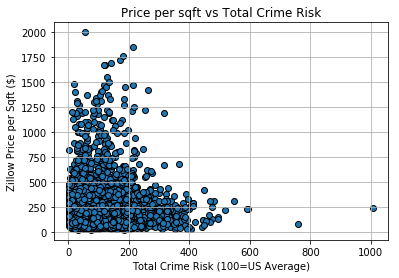

In [644]:
# Scatter plot of all zip codes in US, total crime, & median house price per sqft
import matplotlib.pyplot as plt

plt.scatter(crimes_df_clean['Total Crime Risk'],crimes_df_clean['Zhmpsqf'],edgecolor='black')
plt.title('Price per sqft vs Total Crime Risk')
plt.xlabel('Total Crime Risk (100=US Average)')
plt.ylabel('Zillow Price per Sqft ($)')
plt.grid()
plt.show()

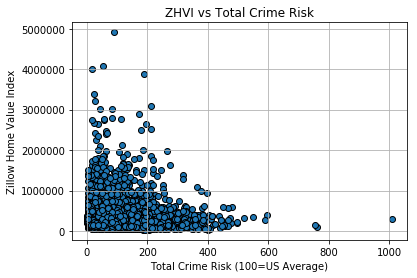

In [645]:
# Scatter plot of all zip codes in US, total crime, & median house price per sqft
import matplotlib.pyplot as plt

plt.scatter(crimes_df_clean['Total Crime Risk'],crimes_df_clean['Zhvi'],edgecolor='black')
plt.title('ZHVI vs Total Crime Risk')
plt.xlabel('Total Crime Risk (100=US Average)')
plt.ylabel('Zillow Home Value Index')
plt.grid()
plt.show()

In [15]:
# Run Regressions for all 10 variables across all zip codes
from scipy.stats import linregress

# Create dataframe for output of regressions
reg_output=pd.DataFrame({})
reg_output['crime_var']=''
reg_output['slope']=''
reg_output['int']=''
reg_output['corr']=''
reg_output['pval']=''
reg_output['stderr']=''

for idx, var in enumerate(crime_vars[1:11]):
    (slope,intercept,corr,pval,stderr)=linregress(crimes_merge[var],crimes_merge['Zhvi'])
    reg_output.loc[idx,'crime_var']=var
    reg_output.loc[idx,'slope']=slope
    reg_output.loc[idx,'int']=intercept
    reg_output.loc[idx,'corr']=corr
    reg_output.loc[idx,'pval']=pval
    reg_output.loc[idx,'stderr']=stderr

reg_output=reg_output.set_index('crime_var')
reg_output

# Which type of crime is most strongly associated with housing values?

# Bar chart of correlations for each of 10 variables
objects = crime_vars[1:11]
y_pos = np.arange(len(objects))
performance = reg_output['corr']
 
plt.bar(y_pos, performance, align='center', alpha=.8,edgecolor="black",color="blue")
plt.xticks(y_pos, objects,rotation=50,ha='right')
plt.ylabel('Correlation Coefficient (r)')
plt.title('Correlation of Home Value Index & Crime Risk')
plt.grid()

plt.savefig("CrimeVarCorrsZhvi.png",bbox_inches='tight')

plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [652]:
crimes_df_clean.columns

Index(['Zip Code', 'County', 'Assault Risk', 'Burglary Risk', 'Larceny Risk',
       'Murder Risk', 'Motor Vehicle Theft Risk', 'Personal Crime Risk',
       'Property Crime Risk', 'Rape Risk', 'Robbery Risk', 'Total Crime Risk',
       'Median household income', 'Population Density', 'fips', 'Closest City',
       'State', 'Zhvi', 'zrmpsqf', 'Zhvisf', 'Zhmpsqf', 'spf', 'Zriahsum',
       'Zrisf'],
      dtype='object')

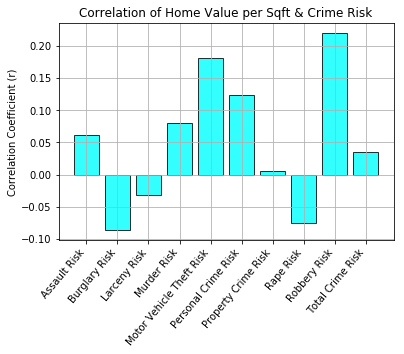

In [725]:
# Run Regressions for all 10 variables across all zip codes
from scipy.stats import linregress

crimes_df_sqft=crimes_df_clean[['Zip Code', 'County', 'Assault Risk', 'Burglary Risk', 'Larceny Risk',
       'Murder Risk', 'Motor Vehicle Theft Risk', 'Personal Crime Risk',
       'Property Crime Risk', 'Rape Risk', 'Robbery Risk', 'Total Crime Risk',
       'Median household income', 'Population Density', 'fips', 'Closest City',
       'State','Zhmpsqf']]

crimes_df_sqft=crimes_df_sqft.dropna(how='any')


# Create dataframe for output of regressions
reg_output=pd.DataFrame({})
reg_output['crime_var']=''
reg_output['slope']=''
reg_output['int']=''
reg_output['corr']=''
reg_output['pval']=''
reg_output['stderr']=''

for idx, var in enumerate(crime_vars[1:11]):
    (slope,intercept,corr,pval,stderr)=linregress(crimes_df_sqft[var],crimes_df_sqft['Zhmpsqf'])
    reg_output.loc[idx,'crime_var']=var
    reg_output.loc[idx,'slope']=slope
    reg_output.loc[idx,'int']=intercept
    reg_output.loc[idx,'corr']=corr
    reg_output.loc[idx,'pval']=pval
    reg_output.loc[idx,'stderr']=stderr

reg_output=reg_output.set_index('crime_var')
reg_output



# Which type of crime is most strongly associated with housing values?

# Bar chart of correlations for each of 10 variables
objects = crime_vars[1:11]
y_pos = np.arange(len(objects))
performance = reg_output['corr']
 
plt.bar(y_pos, performance, align='center', alpha=.8,edgecolor='black',color='cyan')
plt.xticks(y_pos, objects,rotation=50,ha='right')
plt.ylabel('Correlation Coefficient (r)')
plt.title('Correlation of Home Value per Sqft & Crime Risk')
plt.grid()

plt.savefig("CrimeVarCorrsPsqft.png",bbox_inches='tight')

plt.show()

In [662]:
# crimes_df_sqft

# Run regressions for all 10 variables by fips (county)

# Create dataframe for county regression variables
county_reg_output_sqft=pd.DataFrame({})
county_reg_output_sqft['county']=''
county_reg_output_sqft['fips']=''
county_reg_output_sqft['crime_var']=''
county_reg_output_sqft['slope']=''
county_reg_output_sqft['int']=''
county_reg_output_sqft['corr']=''
county_reg_output_sqft['pval']=''
county_reg_output_sqft['stderr']=''
county_reg_output_sqft['total_zips']=''
county_reg_output_sqft['average_crime']=''
county_reg_output_sqft['state']=''


# Create list of unique fips
fips=set(crimes_df_sqft.loc[:,'fips'])
fips=list(fips)

# Counter variable to track interations for populating table
counter=0

# Loop through each county & populate table
for fip in fips:
    county_data=crimes_df_sqft.loc[crimes_df_sqft['fips']==fip,:]
    print(fip)
    
    for idx, var in enumerate(crime_vars[1:11]):
        (slope,intercept,corr,pval,stderr)=linregress(county_data[var],county_data['Zhmpsqf'])
        county_reg_output_sqft.loc[counter*10+idx,'county']=list(set(county_data['County']))[0]
        county_reg_output_sqft.loc[counter*10+idx,'fips']=fip
        county_reg_output_sqft.loc[counter*10+idx,'crime_var']=var
        county_reg_output_sqft.loc[counter*10+idx,'slope']=slope
        county_reg_output_sqft.loc[counter*10+idx,'int']=intercept
        county_reg_output_sqft.loc[counter*10+idx,'corr']=corr
        county_reg_output_sqft.loc[counter*10+idx,'pval']=pval
        county_reg_output_sqft.loc[counter*10+idx,'stderr']=stderr
        county_reg_output_sqft.loc[counter*10+idx,'total_zips']=county_data['Zip Code'].count()
        county_reg_output_sqft.loc[counter*10+idx,'average_crime']=county_data[var].mean()
        county_reg_output_sqft.loc[counter*10+idx,'state']=list(set(county_data['State']))[0]
        
    
    counter+=1


48029
42019
12115
26107
36007
41031
27141
41013
48183
51087
47073
30013
48051
22033
01031
28145
12097
27131
48055
23005
41047
06079
30067
19181
39093
36003
12031
34017
04013
36073
48457
35043
36011
48329
18157
40065
54019
06031
48027
42045
53005
39171
34039
51059
08014
53003
29113
29047
37031
36079
40097
28073
37169
21163
18003
05031
40137
31177
48135
46093
37181
23003
16005
12081
54011
20099
20169
27019
42091
18163
39143
19059
06013
17089
18049
48061
08031
36081
54079
45045
21021
18149
06067
55079
04005
42001
37047
55089
23031
48467
34005
48471
47103
06113
48073
28147
36035
37071
51740
17119
18031
41057
05115
47117
26065
29077
26159
36123
13089
48419
40099
20155
56037
12039
08037
26077
48113
05023
06007
47019
51003
28107
13143
42029
08003
56021
13129
08071
40049
13275
20209
18119
48201
48187
36019
40143
39003
36063
51700
20045
36111
28113
05119
21113
41039
40133
13103
48409
27017
05045
48323
20009
39099
08119
53007
16055
09007
18057
47125
22073
13179
54003
48121
12011
48009
51710
3708

In [663]:
# Find counties with most significant Rape Risk
burg_risk_data=county_reg_output_sqft.loc[county_reg_output_sqft['crime_var']=='Burglary Risk',:]

# Remove counties with NaN for slop
burg_risk_clean=burg_risk_data.dropna(how='any')

# take only counties with at least 10 zip codes
burg_risk_large = burg_risk_data.loc[burg_risk_data['total_zips']>=10,:]

# and where the p-value is > 0.05
burg_risk_sig = burg_risk_large.loc[burg_risk_data['pval']<=0.05,:]

# total counties
all_zips=burg_risk_data['fips'].count()
zips_10=burg_risk_sig['fips'].count()
print(f"Total zips: {all_zips} \nGreater than 10: {zips_10}")

# Sort by 
burg_risk_sig=burg_risk_sig.sort_values(by='slope')

burg_risk_sig

Total zips: 1320 
Greater than 10: 44


,county,fips,crime_var,slope,int,corr,pval,stderr,total_zips,average_crime,state
8091,Fairfield County,09001,Burglary Risk,-1.0364,263.752,-0.58068,0.0232207,0.403006,15,51.8,Connecticut
12671,Essex County,34013,Burglary Risk,-0.772583,309.907,-0.661198,0.0138604,0.264302,13,87,New Jersey
391,Delaware County,42045,Burglary Risk,-0.682454,187.925,-0.568835,0.0171769,0.254772,17,49.8824,Pennsylvania
10721,Passaic County,34031,Burglary Risk,-0.595296,220.621,-0.695538,0.0120186,0.194461,12,59.4167,New Jersey
12841,Bristol County,25005,Burglary Risk,-0.502336,230.443,-0.810465,2.58158e-05,0.0880593,19,43.1053,Massachusetts
6221,Summit County,39153,Burglary Risk,-0.451056,126.245,-0.875963,8.88667e-07,0.0602432,19,75.1053,Ohio
4251,Lake County,17097,Burglary Risk,-0.44715,166.555,-0.552112,0.0328412,0.187284,15,54.4667,Illinois
11191,Oakland County,26125,Burglary Risk,-0.445602,178.688,-0.420243,0.0107152,0.165011,36,58.3333,Michigan
11461,Cobb County,13067,Burglary Risk,-0.445381,178.498,-0.720043,0.00827104,0.135734,12,96.9167,Georgia
6271,Sedgwick County,20173,Burglary Risk,-0.442198,146.935,-0.735927,0.000498522,0.101707,18,97.7222,Kansas


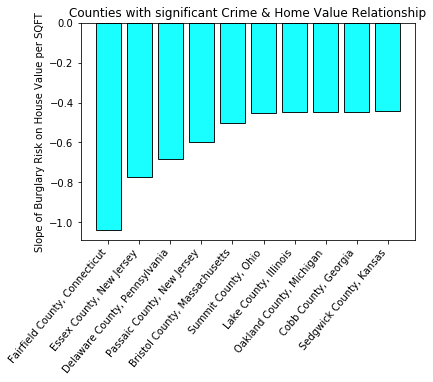

In [777]:
# Which counties have the highest arbitrage oppurtunity in event of gentrification?
sig_counties=burg_risk_sig.sort_values(by='slope')

top_sig_counties=sig_counties.iloc[0:10,:]

# Bar chart of correlations for each of 10 variables
objects = top_sig_counties['county']+', '+top_sig_counties['state']
y_pos = np.arange(len(objects))
performance = top_sig_counties['slope']
 
plt.bar(y_pos, performance, align='center', alpha=.9,edgecolor='black',color='cyan')
plt.xticks(y_pos, objects,rotation=50,ha='right')
plt.ylabel('Slope of Burglary Risk on House Value per SQFT')
plt.title('Counties with significant Crime & Home Value Relationship')

plt.savefig("MostSigCountiesBurg.png",bbox_inches='tight')

plt.show()

In [588]:
# Run regressions for all 10 variables by fips (county)

# Create dataframe for county regression variables
county_reg_output=pd.DataFrame({})
county_reg_output['county']=''
county_reg_output['fips']=''
county_reg_output['crime_var']=''
county_reg_output['slope']=''
county_reg_output['int']=''
county_reg_output['corr']=''
county_reg_output['pval']=''
county_reg_output['stderr']=''
county_reg_output['total_zips']=''
county_reg_output['average_crime']=''
county_reg_output['state']=''


# Create list of unique fips
fips=set(crimes_merge.loc[:,'fips'])
fips=list(fips)

# Counter variable to track interations for populating table
counter=0

# Loop through each county & populate table
for fip in fips:
    county_data=crimes_merge.loc[crimes_merge['fips']==fip,:]
    print(fip)
    
    for idx, var in enumerate(crime_vars[1:11]):
        (slope,intercept,corr,pval,stderr)=linregress(county_data[var],county_data['Zhvi'])
        county_reg_output.loc[counter*10+idx,'county']=list(set(county_data['County']))[0]
        county_reg_output.loc[counter*10+idx,'fips']=fip
        county_reg_output.loc[counter*10+idx,'crime_var']=var
        county_reg_output.loc[counter*10+idx,'slope']=slope
        county_reg_output.loc[counter*10+idx,'int']=intercept
        county_reg_output.loc[counter*10+idx,'corr']=corr
        county_reg_output.loc[counter*10+idx,'pval']=pval
        county_reg_output.loc[counter*10+idx,'stderr']=stderr
        county_reg_output.loc[counter*10+idx,'total_zips']=county_data['Zip Code'].count()
        county_reg_output.loc[counter*10+idx,'average_crime']=county_data[var].mean()
        county_reg_output.loc[counter*10+idx,'state']=list(set(county_data['State']))[0]
        
    
    counter+=1


48029
42019
12115
26107
36007
41031
27141
41013
48183
26123
51087
47073
30013
48051
22033
01031
28145
12097
27131
48055
23005
41047
06079
30067
42021
19181
39093
36003
22125
12031
34017
04013
36073
48457
35043
36011
48329
18157
22019
40065
54019
06031
48027
42045
53005
39171
34039
51059
22009
08014
53003
29113
48281
29047
37031
36079
40097
28073
37169
21163
18003
05031
40137
31177
48135
46093
37181
23003
16005
12081
08075
54011
20099
20169
27019
42091
18163
39143
19059
06013
17089
18049
48061
08031
36081
28027
54079
45045
35031
21021
51035
18149
06067
55079
04005
42001
37047
55089
23031
48467
34005
48471
47103
50003
06113
22063
42055
48073
28147
36035
37071
51740
17119
18031
41057
05115
47117
26065
29077
26159
36123
13089
48419
40099
20155
56037
12039
08037
38071
26077
48113
05023
06007
47019
51003
28107
13143
42029
08003
56021
13129
08071
40049
13275
20209
18119
48201
48187
36019
40143
39003
36063
51700
20045
36111
28113
05119
21113
41039
40133
13103
48409
27017
05045
21221
48323
2000

47041
41017
55133
28079
37105
01123
36117
42101
28049
44007
37025
26015
47051
27091
18167
29001
08015
26075
48115
18081
27009
42035
37171
48487
29131
06029
40115
36047
04017
21019
47059
48257
13219
40071
37099
47009
48147
17199
12129
21037
06033
24039
20091
45057
34013
17143
48341
08035
36029
45031
49053
26143
33001
37173
50021
34035
17031
53059
39081
51610
13189
19163
25005
25007
21155
01077
25001
48353
06071
13147
24003
41009
05033
39047
24033
12127
06115
39049
48277
26045
40091
12045
53035
31109
02290
01109
09003
37109
22109
18103
21117
49043
48229
29071
42133
32023
01055
37189
48251
45053


In [589]:
county_reg_output

,county,fips,crime_var,slope,int,corr,pval,stderr,total_zips,average_crime,state
0,Bexar County,48029,Assault Risk,141.391,198945,0.0357319,0.817883,610.188,44,55.9545,Texas
1,Bexar County,48029,Burglary Risk,-209.147,235405,-0.134526,0.38396,237.715,44,136.5,Texas
2,Bexar County,48029,Larceny Risk,-198.407,239964,-0.172371,0.263199,174.952,44,166.864,Texas
3,Bexar County,48029,Murder Risk,-483.733,265839,-0.239991,0.11662,301.929,44,121.932,Texas
4,Bexar County,48029,Motor Vehicle Theft Risk,-582.264,276649,-0.37845,0.0113065,219.746,44,119.864,Texas
5,Bexar County,48029,Personal Crime Risk,-1173.18,328095,-0.351639,0.0192497,481.929,44,103.341,Texas
6,Bexar County,48029,Property Crime Risk,-344.348,257633,-0.243722,0.110875,211.437,44,147.455,Texas
7,Bexar County,48029,Rape Risk,-716.98,299559,-0.327425,0.0300398,319.261,44,129.295,Texas
8,Bexar County,48029,Robbery Risk,-652.364,271782,-0.321409,0.0333855,296.572,44,99.5227,Texas
9,Bexar County,48029,Total Crime Risk,-682.999,296190,-0.311722,0.039414,321.241,44,130.795,Texas


In [591]:
# Find counties with most significant Rape Risk
rape_risk_data=county_reg_output.loc[county_reg_output['crime_var']=='Rape Risk',:]

# Remove counties with NaN for slop
rape_risk_clean=rape_risk_data.dropna(how='any')

# take only counties with at least 10 zip codes
rape_risk_large = rape_risk_data.loc[rape_risk_data['total_zips']>=10,:]

# and where the p-value is > 0.05
rape_risk_sig = rape_risk_large.loc[rape_risk_data['pval']<=0.05,:]

# total counties
all_zips=rape_risk_data['fips'].count()
zips_10=rape_risk_sig['fips'].count()
print(f"Total zips: {all_zips} \nGreater than 10: {zips_10}")

# Sort by 
rape_risk_sig.sort_values(by='slope')

Total zips: 1466 
Greater than 10: 52


,county,fips,crime_var,slope,int,corr,pval,stderr,total_zips,average_crime,state
7927,Santa Clara County,06085,Rape Risk,-15169.5,2.81574e+06,-0.637133,2.93561e-05,3147.15,36,78.6944,California
797,Contra Costa County,06013,Rape Risk,-4948.93,1.16446e+06,-0.488645,0.0245948,2027.21,21,64,California
9207,Fairfield County,09001,Rape Risk,-4871.62,659939,-0.596859,0.018824,1816.32,15,43.2667,Connecticut
7787,San Joaquin County,06077,Rape Risk,-3393.27,631743,-0.652314,0.0156732,1188.79,13,71.3846,California
807,Kane County,17089,Rape Risk,-3177.72,316966,-0.686692,0.0195984,1121.34,11,23.5455,Illinois
4267,Middlesex County,25017,Rape Risk,-3047.92,725941,-0.363421,0.0130448,1177.9,46,26.7609,Massachusetts
4907,Lake County,17097,Rape Risk,-2833.5,354347,-0.552852,0.0325594,1184.49,15,29.8667,Illinois
3627,King County,53033,Rape Risk,-2778.2,993287,-0.585635,6.35059e-06,549.328,51,118.608,Washington
4737,Westmoreland County,42129,Rape Risk,-2484.37,318259,-0.845875,0.0010331,522.187,11,70.6364,Pennsylvania
10017,Essex County,25009,Rape Risk,-2442.46,525438,-0.627835,0.00303814,713.704,20,40.35,Massachusetts


In [443]:
endpts

[-134500.0,
 -118480.0,
 -102460.0,
 -86440.0,
 -70420.0,
 -54400.0,
 -38380.0,
 -22360.0,
 -6340.0,
 9680.0,
 25700.0,
 41720.0,
 57740.0,
 73760.0,
 89780.0,
 105800.0]

In [447]:
# Graph data coverage by county

import plotly.plotly as py
import plotly.figure_factory as ff

import plotly 
plotly.tools.set_credentials_file(username='edshafron', api_key='KRPiJ5uMJPGKIr6X2D3F')

colorscale = ["#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]

endpts = [1,2,5,10,20,30,50,100]
fips = rape_risk_data['fips'].tolist()
values = rape_risk_data['total_zips'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=True,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    show_hover=True, centroid_marker={'opacity': 1},
    asp=2.9, title='Data Coverage by County',
    legend_title='# of Zip codes in county',

)
py.iplot(fig, filename='choropleth_full_usa')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~edshafron/0 or inside your plot.ly account where it is named 'choropleth_full_usa'


In [510]:
# Graph significant data coverage by county (>10 zip codes in a county)

import plotly.plotly as py
import plotly.figure_factory as ff

import plotly 
plotly.tools.set_credentials_file(username='edshafron', api_key='KRPiJ5uMJPGKIr6X2D3F')

colorscale = ["#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]

endpts = [1,2,5,10,20,30,50,100]
fips = rape_risk_large['fips'].tolist()
values = rape_risk_large['total_zips'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=True,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    show_hover=True, centroid_marker={'opacity': 1},
    asp=2.9, title='Significant Data Coverage by County (At Least 10 zip codes)',
    legend_title='# of Zip codes in county',

)
py.iplot(fig, filename='choropleth_full_usa')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~edshafron/0 or inside your plot.ly account where it is named 'choropleth_full_usa'


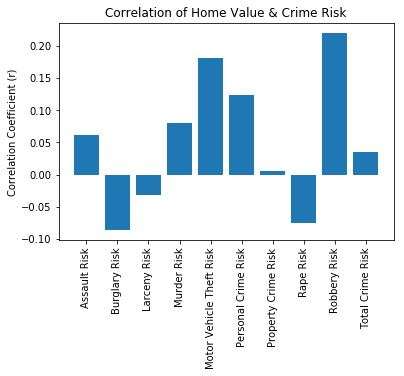

In [654]:


# Scatterplot of county correlations: pval on y axis, slope on x axis
# plt.scatter(rape_risk_clean['slope'],rape_risk_clean['pval'],edgecolor='black')

# Bubble plot of 10 highest slope counties: city labels included; size = population, y-axis=slope, 
# x-axis=distance from mean

# Graph of nationwide outliers - mean income on x axis, average residual on y axis

# Graph of highest residuals - scatterplot with city labels, 

In [1]:
# Which counties have the highest arbitrage oppurtunity in event of gentrification?
sig_counties=rape_risk_sig.sort_values(by='slope')

top_sig_counties=sig_counties.iloc[0:10,:]

# Bar chart of correlations for each of 10 variables
objects = top_sig_counties['county']+', '+top_sig_counties['state']
y_pos = np.arange(len(objects))
performance = top_sig_counties['slope']
 
plt.bar(y_pos, performance, align='center', alpha=.9,color='blue',edgecolor='black')
plt.xticks(y_pos, objects,rotation=.5,ha='right')
plt.ylabel('Slope of Rape Risk on House Value')
plt.title('10 Significant Counties with Highest Gentrifaction Arbitrage Oppurtunity')

plt.savefig("MostSigCounties.png",bbox_inches='tight')

plt.show()

NameError: name 'rape_risk_sig' is not defined

In [596]:
# Which zip codes in significant counties have the greatest potential arbitrage?

# Create empty rows for zips in our significant counties
sig_zips_potential=pd.DataFrame({})
sig_zips_potential['Zip Code']=[]
sig_zips_potential['County']=[]
sig_zips_potential['Potential']=[]
sig_zips_potential['Closest City']=[]

counter=0

# Loop through each zip code in merged data
for index,row in crimes_merge.iterrows():
    if row['fips'] in set(rape_risk_sig['fips']):
        county_slope=rape_risk_sig.loc[rape_risk_sig['fips']==row['fips'],'slope'].iloc[0]
        
        if county_slope < 0:
        
            county_crime_avg=rape_risk_sig.loc[rape_risk_sig['fips']==row['fips'],'average_crime'].iloc[0]
            zip_crime=row['Rape Risk']

            sig_zips_potential.loc[counter,'Zip Code']=row['Zip Code']
            sig_zips_potential.loc[counter,'Closest City']=row['Closest City']
            sig_zips_potential.loc[counter,'County']=row['County']
            sig_zips_potential.loc[counter,'Potential']= county_slope*(county_crime_avg-zip_crime)
            
            counter+=1
            

sig_zips_potential=sig_zips_potential.sort_values(by='Potential',ascending=False)

sig_zips_potential.head()

,Zip Code,County,Potential,Closest City
446,95128,Santa Clara County,1.157517e+06,"San Jose city, CA"
1038,95130,Santa Clara County,1.036161e+06,"San Jose city, CA"
328,95136,Santa Clara County,8.541268e+05,"San Jose city, CA"
50,95123,Santa Clara County,7.024319e+05,"San Jose city, CA"
96,95112,Santa Clara County,6.569234e+05,"San Jose city, CA"


In [579]:
crimes_merge.loc[crimes_merge['Zip Code']=='94601',:]

,Zip Code,County,Assault Risk,Burglary Risk,Larceny Risk,Murder Risk,Motor Vehicle Theft Risk,Personal Crime Risk,Property Crime Risk,Rape Risk,Robbery Risk,Total Crime Risk,Median household income,Population Density,fips,Zhvi
1508,94601,Alameda County,93,98,79,248,185,187,101,182,211,131,42791.0,16420.4,06001,558500


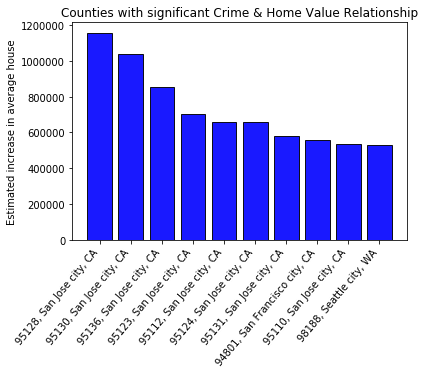

In [778]:
# Which zip codes would be worth the most if crime returned to the county average?
top_sig_zips=sig_zips_potential.iloc[0:10,:]

# Bar chart of correlations for each of 10 variables
objects = top_sig_zips['Zip Code']+', '+top_sig_zips['Closest City']
y_pos = np.arange(len(objects))
performance = top_sig_zips['Potential']
 
plt.bar(y_pos, performance, align='center', alpha=.9,edgecolor='black',color='blue')
plt.xticks(y_pos, objects,rotation=50,ha='right')
plt.ylabel('Estimated increase in average house')
plt.title('Counties with significant Crime & Home Value Relationship')

plt.savefig("MostPotentialZips.png",bbox_inches='tight')

plt.show()

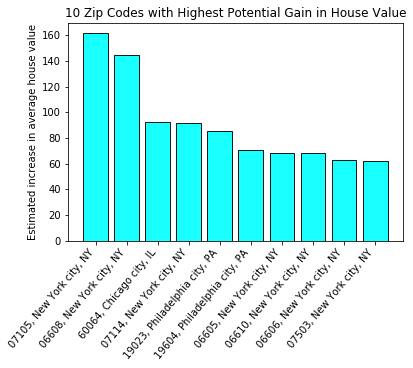

In [773]:
# Which zip codes in significant counties have the greatest potential arbitrage?

# Create empty rows for zips in our significant counties
sig_zips_potential_b=pd.DataFrame({})
sig_zips_potential_b['Zip Code']=[]
sig_zips_potential_b['County']=[]
sig_zips_potential_b['Potential']=[]
sig_zips_potential_b['Closest City']=[]

counter=0

# Loop through each zip code in merged data
for index,row in crimes_df_sqft.iterrows():
    if row['fips'] in set(burg_risk_sig['fips']):
        county_slope=burg_risk_sig.loc[burg_risk_sig['fips']==row['fips'],'slope'].iloc[0]
        
        if county_slope < 0:
        
            county_crime_avg=burg_risk_sig.loc[burg_risk_sig['fips']==row['fips'],'average_crime'].iloc[0]
            zip_crime=row['Burglary Risk']

            sig_zips_potential_b.loc[counter,'Zip Code']=row['Zip Code']
            sig_zips_potential_b.loc[counter,'Closest City']=row['Closest City']
            sig_zips_potential_b.loc[counter,'County']=row['County']
            sig_zips_potential_b.loc[counter,'Potential']= county_slope*(county_crime_avg-zip_crime)
            
            counter+=1
            

sig_zips_potential_b=sig_zips_potential_b.sort_values(by='Potential',ascending=False)

sig_zips_potential_b.head()

# Which zip codes would be worth the most if burglary risk returned to the county average?
top_sig_zips=sig_zips_potential_b.iloc[0:10,:]

# Bar chart of correlations for each of 10 variables
objects = top_sig_zips['Zip Code']+', '+top_sig_zips['Closest City']
y_pos = np.arange(len(objects))
performance = top_sig_zips['Potential']
 
plt.bar(y_pos, performance, align='center', alpha=.9,edgecolor='black',color='cyan')
plt.xticks(y_pos, objects,rotation=50,ha='right')

plt.ylabel('Estimated increase in average house value')
plt.title('10 Zip Codes with Highest Potential Gain in House Value')

plt.savefig("MostPotentialZipsBurg.png",bbox_inches='tight')

plt.show()

,county,fips,crime_var,slope,int,corr,pval,stderr,total_zips,average_crime,state
1,Bexar County,48029,Burglary Risk,-0.0140132,116.595,-0.0426176,0.783563,0.0506909,44,136.5,Texas
11,Butler County,42019,Burglary Risk,8,-79,1,0,0,2,27,Pennsylvania
21,Sarasota County,12115,Burglary Risk,0.245454,165.201,0.399252,0.112371,0.145537,17,131.471,Florida
31,Mecosta County,26107,Burglary Risk,NaN,NaN,0,NaN,NaN,1,81,Michigan
41,Broome County,36007,Burglary Risk,-0.623841,105.354,-0.988674,0.00144455,0.0546749,5,40,New York


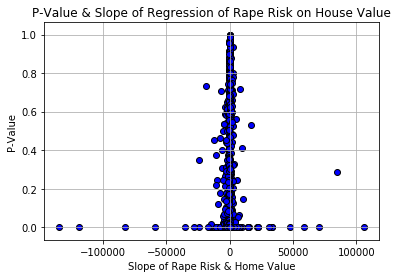

In [756]:
# Does the effect of Rape Risk vary by county?
# Yes - although most counties tend to have a relatively small slope
plt.scatter(rape_risk_clean['slope'],rape_risk_clean['pval'],edgecolor='black',color='blue')
plt.ylabel('P-Value')
plt.xlabel('Slope of Rape Risk & Home Value')
plt.title('P-Value & Slope of Regression of Rape Risk on House Value')
plt.grid()
plt.savefig('PValSlopeCountyAll.png',bbox_inches='tight')

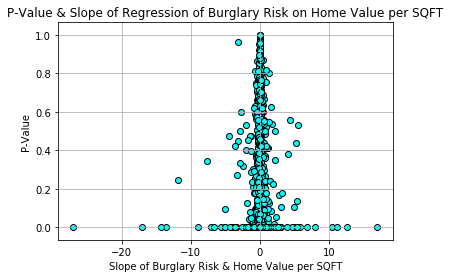

In [757]:
# Does the effect of Rape Risk vary by county?
# Yes - although most counties tend to have a relatively small slope
plt.scatter(burg_risk_clean['slope'],burg_risk_clean['pval'],edgecolor='black',color='cyan')
plt.ylabel('P-Value')
plt.xlabel('Slope of Burglary Risk & Home Value per SQFT')
plt.title('P-Value & Slope of Regression of Burglary Risk on Home Value per SQFT')
plt.grid()
plt.savefig('PValSlopeCountyAllBurg.png',bbox_inches='tight')

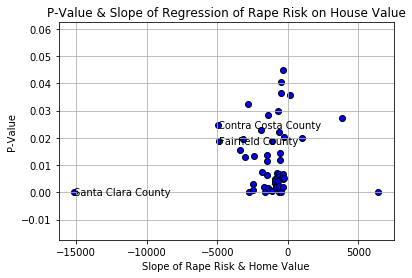

In [754]:
# How much of these correlations are likely to be accurate?
rape_risk_sig=rape_risk_sig.sort_values(by='slope')
plt.scatter(rape_risk_sig['slope'],rape_risk_sig['pval'],edgecolor='black',color='blue')
plt.ylabel('P-Value')
plt.xlabel('Slope of Rape Risk & Home Value')
plt.title('P-Value & Slope of Regression of Rape Risk on House Value')
plt.grid()

  
x = list(rape_risk_sig['slope'])[0:3]
y = list(rape_risk_sig['pval'])[0:3]
n = list(rape_risk_sig['county'])[0:3]


for i, txt in enumerate(n):
    plt.text(s=txt, x=x[i], y=y[i],ha='left',va='center')

plt.savefig('PvalSlopeByCounty.png',bbox_inches='tight')

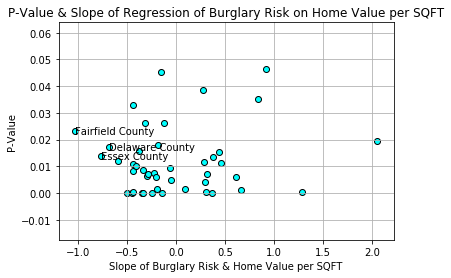

In [759]:
# How much of these correlations are likely to be accurate?
burg_risk_sig=burg_risk_sig.sort_values(by='slope')

plt.scatter(burg_risk_sig['slope'],burg_risk_sig['pval'],edgecolor='black',color='cyan')
plt.ylabel('P-Value')
plt.xlabel('Slope of Burglary Risk & Home Value per SQFT')
plt.title('P-Value & Slope of Regression of Burglary Risk on Home Value per SQFT')
plt.grid()

x = list(burg_risk_sig['slope'])[0:3]
y = list(burg_risk_sig['pval'])[0:3]
n = list(burg_risk_sig['county'])[0:3]


for i, txt in enumerate(n):
    plt.text(s=txt, x=x[i], y=y[i],ha='left',va='center')

plt.savefig('PvalSlopeByCountyBurg.png',bbox_inches='tight')

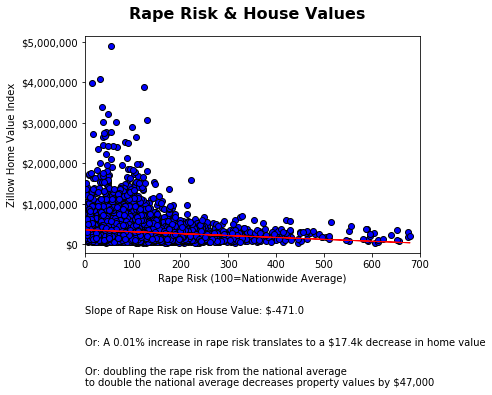

In [724]:
# How large is the effect of Rape Risk on housing price?

# $470 / unit
# Rape risk is 0.027% nationwide (source: https://en.wikipedia.org/wiki/Rape_statistics#United_States)
# 1 unit = 0.027%/100

# A 0.01% increase in rape risk translates to a $17.4k decrease in home value

# Or : doubling the rape risk from the national average to doube the national average 
# decreases property values by $47,000

import matplotlib as mpl

fig, (ax1) = plt.subplots(nrows=1, sharex=True)
fig.suptitle("Rape Risk & House Values", fontsize=16, fontweight="bold")

ax1.set_xlim(0, 700)

r_risks=crimes_merge.loc[:,'Rape Risk']

fit1=r_risks * reg_output.loc['Rape Risk','slope'] + reg_output.loc['Rape Risk','int']

ax1.scatter(r_risks, crimes_merge['Zhvi'], linewidth=1, marker="o",edgecolor='black',color='blue')
ax1.plot(crimes_merge['Rape Risk'], fit1, color='red', linewidth=1)

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

plt.xlabel('Rape Risk (100=Nationwide Average)')
plt.ylabel('Zillow Home Value Index')

plt.text(s=f"Slope of Rape Risk on House Value: ${round(reg_output.loc['Rape Risk','slope'],0)}\n",y=-2000000,x=0)
plt.text(s="Or: A 0.01% increase in rape risk translates to a $17.4k decrease in home value",y=-2500000,x=0)  
plt.text(s="Or: doubling the rape risk from the national average\nto double the national average decreases property values by $47,000",y=-3500000,x=0)  
         
plt.savefig("NationwideRegression.png",bbox_inches='tight')

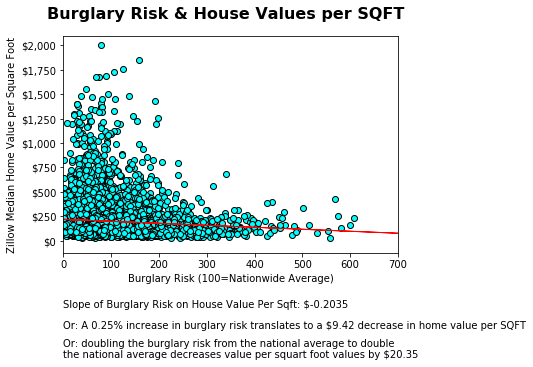

In [735]:
# How large is the effect of Burglary Risk on housing price?

# 542 burglaries per 100,000 people
# $0.2035 / unit
# Burglary risk is 0.54% nationwide (source: hhttps://www.alarms.org/burglary-statistics/)
# 1 unit = 0.54%/100

# A 0.25% increase in burglary risk translates to a $9.42 decrease in home value per SQFT

# Or : doubling the burglary risk from the national average to double the national average 
# decreases the value per squart foot by $20.35

fig, (ax1) = plt.subplots(nrows=1, sharex=True)
fig.suptitle("Burglary Risk & House Values per SQFT", fontsize=16, fontweight="bold")

ax1.set_xlim(0, 700)

r_risks=crimes_df_sqft.loc[:,'Burglary Risk']

fit1=r_risks * reg_output.loc['Burglary Risk','slope'] + reg_output.loc['Burglary Risk','int']

ax1.scatter(r_risks, crimes_df_sqft['Zhmpsqf'], linewidth=1, marker="o", color='cyan',edgecolor='black')
ax1.plot(crimes_df_sqft['Burglary Risk'], fit1, color='red', linewidth=1)

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

plt.xlabel('Burglary Risk (100=Nationwide Average)')
plt.ylabel('Zillow Median Home Value per Square Foot')

plt.text(s=f"Slope of Burglary Risk on House Value Per Sqft: ${round(reg_output.loc['Burglary Risk','slope'],4)}\n",y=-800,x=0)
plt.text(s="Or: A 0.25% increase in burglary risk translates to a $9.42 decrease in home value per SQFT",y=-900,x=0)  
plt.text(s="Or: doubling the burglary risk from the national average to double\nthe national average decreases value per squart foot values by $20.35",y=-1200,x=0)  
         
plt.savefig("NationwideRegressionSQFT.png",bbox_inches='tight')

In [ ]:
# Which counties & zip codes are outliers in this analysis? 

